<a href="https://colab.research.google.com/github/samarjahanahmedburney/Titanic_survival_prediction/blob/main/Titanic__train_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All Libraries**

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

# **uploading file on colab**

In [151]:
df = pd.read_csv("/content/sample_data/train data set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Survival Rate**

Survival Rate: 0.3838383838383838


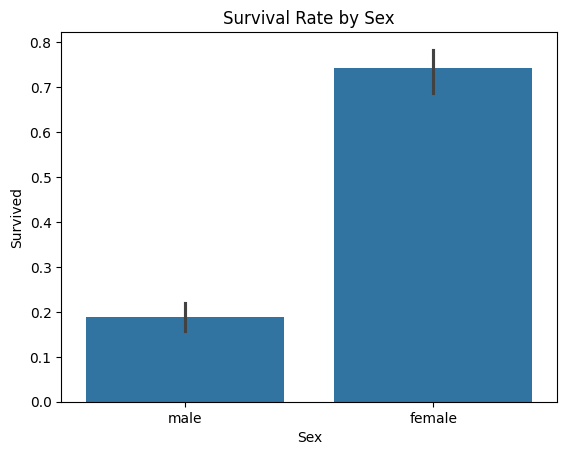

In [153]:
# Survival rate between male/female
print("Survival Rate:", df['Survived'].mean())
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()

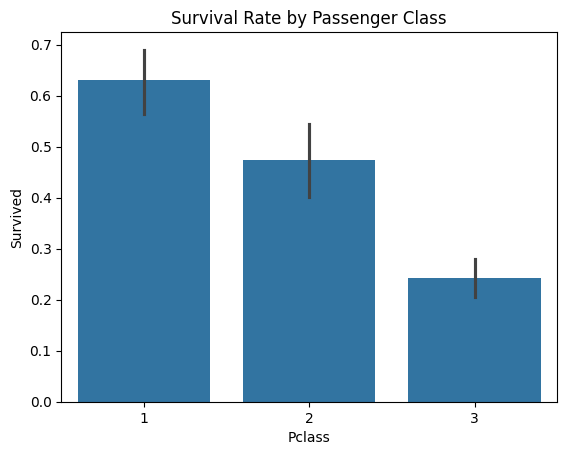

In [154]:
# Survival rate by passenger classes
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

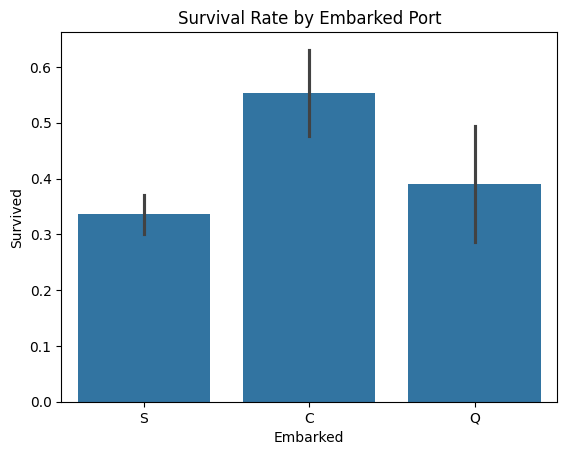

In [155]:
# Survival rate by embarked port
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

# **Data Cleaning**
with before and after

In [156]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Copy the dataset for cleaning
df_cleaned = df.copy()

# Apply IQR filtering for each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    print(f"{col}: Kept values between {lower_bound:.2f} and {upper_bound:.2f}")


PassengerId: Kept values between -444.00 and 1336.00
Survived: Kept values between -1.50 and 2.50
Pclass: Kept values between 0.50 and 4.50
Age: Kept values between -6.69 and 64.81
SibSp: Kept values between -1.50 and 2.50
Parch: Kept values between 0.00 and 0.00
Fare: Kept values between -26.72 and 65.63


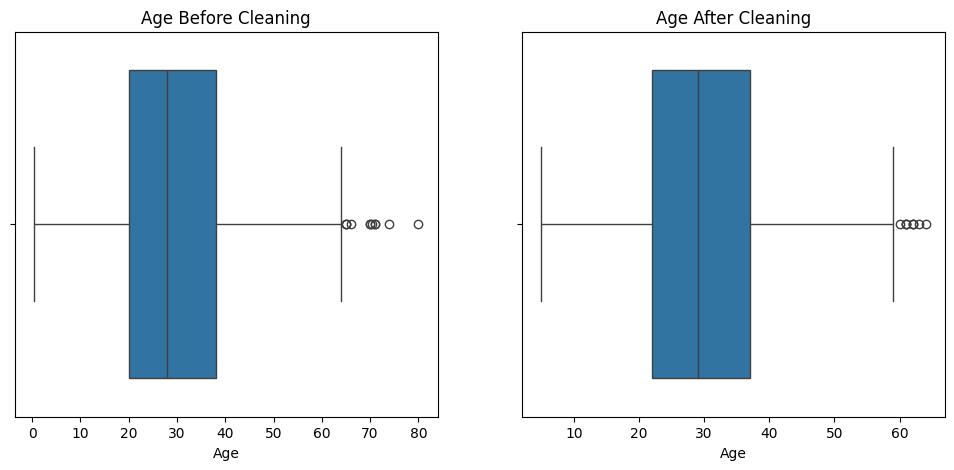

In [157]:
plt.figure(figsize=(12, 5))

# Before cleaning
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Age Before Cleaning")

# After cleaning
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Age'])
plt.title("Age After Cleaning")

plt.show()

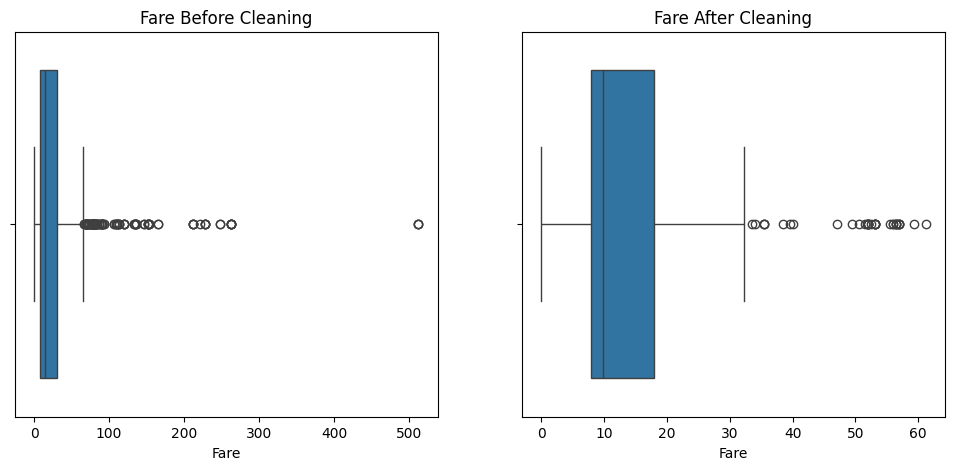

In [158]:
plt.figure(figsize=(12,5))

# Before cleaning
plt.subplot(1,2,1)
sns.boxplot(x=df['Fare'])
plt.title("Fare Before Cleaning")

# After cleaning
plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Fare'])
plt.title("Fare After Cleaning")

plt.show()

In [159]:
print("Before cleaning:\n")
print(df[numeric_cols].describe())

print("\nAfter cleaning:\n")
print(df_cleaned[numeric_cols].describe())

Before cleaning:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

After cleaning:

       PassengerId    Survived      Pclass   

In [160]:
print("Before cleaning sample:")
print(df.head())

print("\nAfter cleaning sample:")
print(df_cleaned.head())

Before cleaning sample:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [161]:
print("Original dataset shape:", df.shape)
print("Filtered dataset shape:", df_cleaned.shape)

Original dataset shape: (891, 12)
Filtered dataset shape: (449, 12)


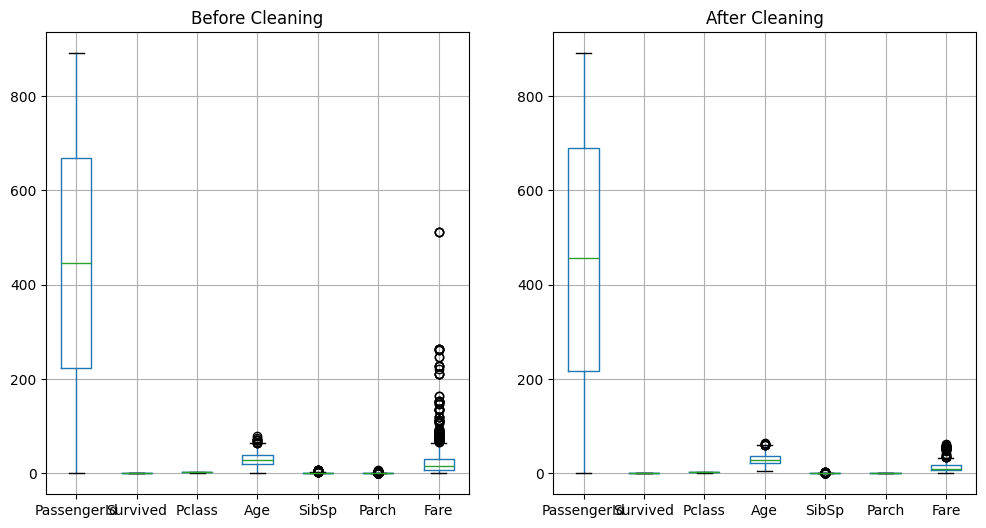

In [162]:
plt.figure(figsize=(12,6))

# Before cleaning
plt.subplot(1,2,1)
df[numeric_cols].boxplot()
plt.title("Before Cleaning")

# After cleaning
plt.subplot(1,2,2)
df_cleaned[numeric_cols].boxplot()
plt.title("After Cleaning")

plt.show()

In [163]:
df_dropped = df.dropna()
print("Original shape:", df.shape)
print("After dropping:", df_dropped.shape)

Original shape: (891, 12)
After dropping: (183, 12)


In [164]:
df_dropped = df.dropna(subset=['Age'])
print("After dropping rows with missing Age:", df_dropped.shape)

After dropping rows with missing Age: (714, 12)


In [165]:
df_dropped = df.dropna(axis=1)
print("After dropping columns with NaN:", df_dropped.shape)

After dropping columns with NaN: (891, 9)


In [166]:
df_dropped = df.dropna(how='all')

In [167]:
print("Missing values before:\n", df.isnull().sum())

df_cleaned = df.dropna(subset=['Age','Embarked','Fare'])

print("\nMissing values after:\n", df_cleaned.isnull().sum())

Missing values before:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


# **Feature Engineering**

In [168]:
def feature_engineer(df_in):
    df = df_in.copy()

    # Title
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    df['Title'] = df['Title'].replace([
        'Mlle','Mme','Ms','Lady','Countess','Capt','Col','Don','Dr','Major',
        'Rev','Sir','Jonkheer','Dona'
    ], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle':'Miss','Mme':'Mrs','Ms':'Miss'})

    # Family
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Deck from Cabin
    df['Deck'] = df['Cabin'].fillna('U').astype(str).str[0]

    # Handle missing Age by Title median using transform
    df['Age'] = df.groupby('Title')['Age'].transform(lambda grp: grp.fillna(grp.median()))
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Handle missing Embarked
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Handle missing Fare
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Remove outliers in Fare
    df.loc[df['Fare'] > 500, 'Fare'] = df['Fare'].median()

    return df

df = feature_engineer(df)

In [169]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','Deck','FamilySize','IsAlone']
target = 'Survived'
X = df[features]
y = df[target]

numeric_features = ['Age','Fare','SibSp','Parch','FamilySize']
categorical_features = ['Pclass','Sex','Embarked','Title','Deck','IsAlone']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [170]:
df_engineered = feature_engineer(df)
print(df_engineered[['Name','Title','FamilySize','IsAlone','Deck']].head(10))

                                                Name   Title  FamilySize  \
0                            Braund, Mr. Owen Harris      Mr           2   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs           2   
2                             Heikkinen, Miss. Laina    Miss           1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs           2   
4                           Allen, Mr. William Henry      Mr           1   
5                                   Moran, Mr. James      Mr           1   
6                            McCarthy, Mr. Timothy J      Mr           1   
7                     Palsson, Master. Gosta Leonard  Master           5   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs           3   
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs           2   

   IsAlone Deck  
0        0    U  
1        0    C  
2        1    U  
3        0    C  
4        1    U  
5        1    U  
6        1    E  
7        0    U  
8

In [171]:
print("Missing values before:", df.isnull().sum())
print("Missing values after:", df_engineered.isnull().sum())

Missing values before: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
IsAlone          0
Deck             0
dtype: int64
Missing values after: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
IsAlone          0
Deck             0
dtype: int64


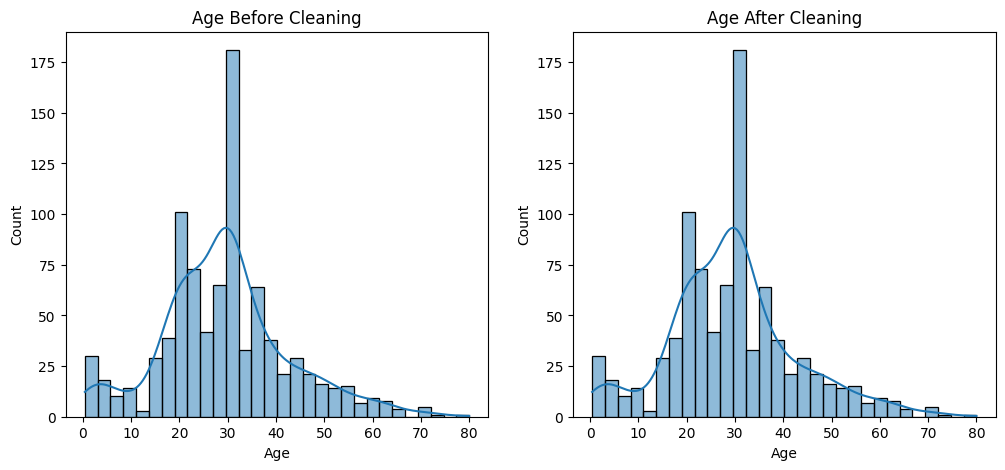

In [172]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Age Before Cleaning")

sns.histplot(df_engineered['Age'], bins=30, kde=True, ax=ax[1])
ax[1].set_title("Age After Cleaning")
plt.show()

In [173]:
print(df_engineered['Title'].value_counts())
print(df_engineered['Deck'].value_counts())
print(df_engineered['IsAlone'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Rare             26
the Countess      1
Name: count, dtype: int64
Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
IsAlone
1    537
0    354
Name: count, dtype: int64


# **Models name**

In [174]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'XGBoost': xgb.XGBClassifier(n_estimators=300, learning_rate=0.05,
                                 max_depth=4, subsample=0.8, colsample_bytree=0.8,
                                 random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05,
                                   max_depth=-1, subsample=0.8, colsample_bytree=0.8,
                                   random_state=42)
}

# **train test split**

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# **Models Accuracy Result**
creating pipelines

In [176]:
results = []
for name, clf in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('clf', clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.8436
Random Forest: Accuracy = 0.7933
Gradient Boosting: Accuracy = 0.8156
SVC: Accuracy = 0.8324
KNN: Accuracy = 0.8045
XGBoost: Accuracy = 0.8156
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

# **Model Accuracy Summary**

In [177]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nModel Accuracy Summary:\n", results_df)


Model Accuracy Summary:
                  Model  Accuracy
0  Logistic Regression  0.843575
1        Random Forest  0.793296
2    Gradient Boosting  0.815642
3                  SVC  0.832402
4                  KNN  0.804469
5              XGBoost  0.815642
6             LightGBM  0.798883


# **Model Accuracy Barplot**

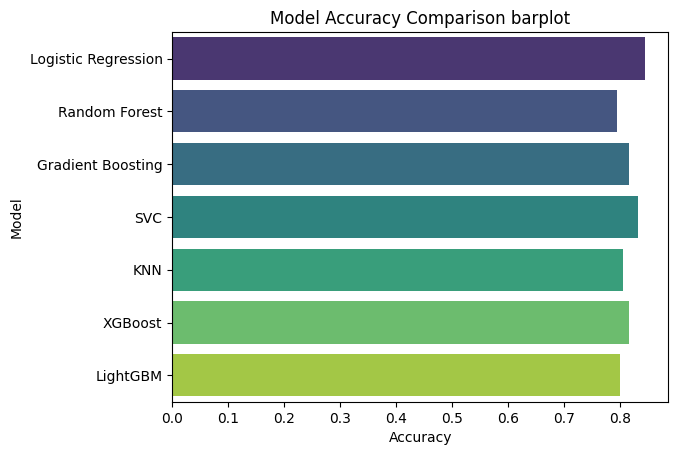

In [178]:
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison barplot")
plt.show()